# Matplotlib avanzado

**Autor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />
**Github:** <https://github.com/rpmunoz> <br />

Veremos cómo crear un gráfico de dispersión en Matplotlib, como graficar barras de errores y como mejorar la presentación de los gráficos

## Importar los paquetes Numpy y Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Gráficos de puntos

Un gráfico muy empleado en análisis de datos corresponde al gráfico de puntos o de dispersión.

Partimos usando el método getfromtxt() de Numpy para leer datos del archivo galaxies_hcn_hco.dat

In [2]:
data = np.genfromtxt('data/galaxies_hcn_hco.dat',
                     usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9),
                     dtype=[('LprimeHCN', float),
                            ('LprimeerrHCN', float),
                            ('HCNlim', int),
                            ('LprimeHCO', float),
                            ('LprimeerrHCO', float),
                            ('HCOlim', int),
                            ('PAH62', float),
                            ('PAH62err', float),
                            ('PAH62lim', int)])

In [3]:
data[0]

(  3.12000000e+08,  41500000., 0,   3.38000000e+08,  47100000., 0,  0.32,  0.02, 0)

Calculamos algunas cantidades de interés, como la razón entre la intensidad de las líneas HCN y HCO.

Es importante limpiar los datos antes de graficarlos

In [4]:
ratio = data['LprimeHCN'] / data['LprimeHCO']
ratioerr = ratio * np.sqrt((data['LprimeerrHCN']/data['LprimeHCN'])**2 + 
                           (data['LprimeerrHCO']/data['LprimeHCO'])**2)

# Definimos 4 máscaras. valid contiene los valores válidos del ratio,
# nolim aquellos valores que no tienen límiter inferior ni superior,
# uplim aquellos que tienen limite superior,
# lolim aquellos que tienen limite inferior

valid = np.invert(np.logical_and(data['HCNlim'], data['HCOlim']))
nolim = np.invert(np.logical_or(data['HCNlim'], data['HCOlim']))
uplim = (valid * data['HCNlim']) > 0
lolim = (valid * data['HCOlim']) > 0

In [5]:
nolim

array([ True,  True,  True,  True, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True], dtype=bool)

Ahora graficamos los datos. En el eje X usaremos el campo 'PAH62' que corresponde al ancho equivalente de una línea de emisión y en el eje Y usaremos el campo ratio que calculamos anteriormente.

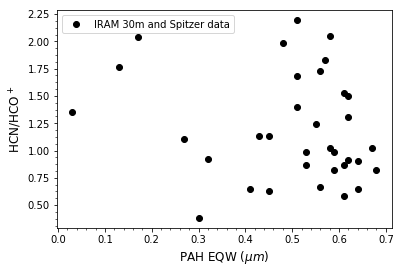

In [6]:
# Crear la figura que contendrá el gráfico

fig = plt.figure()
plt.plot(data['PAH62'][nolim],
         ratio[nolim],
         marker='o',
         color='black',
         linestyle='',
         label='IRAM 30m and Spitzer data')

# let's label our axes
plt.xlabel(r'PAH EQW ($\mu m$)', fontsize='large')
plt.ylabel(r'HCN/HCO$^+$', fontsize='large')

# i like showing minor tickmarks
plt.minorticks_on()

# let's show a legend
plt.legend(loc='best', frameon=True)

El gráfico se ve bien. Que tal si agregamos las barras de error.

(0.5, 2.5)

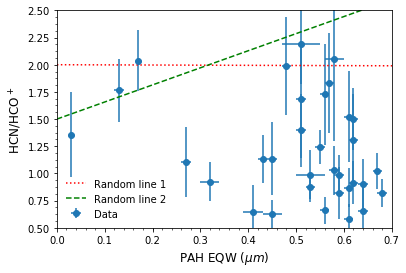

In [7]:
plt.figure()
plt.errorbar(data['PAH62'][nolim],
             ratio[nolim],
             marker='o',
             linestyle='',
             xerr=data['PAH62err'][nolim],
             yerr=ratioerr[nolim],
             label='Data')
plt.xlabel(r'PAH EQW ($\mu m$)', fontsize='large')
plt.ylabel(r'HCN/HCO$^+$', fontsize='large')
plt.minorticks_on()

# there's no simple theoretical model for this, so let's just plot a couple lines
# on top of the data
plt.plot([0,100],
         [2.0, 0.6],
         color='red',
         linestyle=':',
         label='Random line 1')
plt.plot([0,0.7],
         [1.5, 2.6],
         color='green',
         linestyle='--',
         label='Random line 2')
plt.legend(loc='best', frameon=False)

plt.xlim([0,0.7])
plt.ylim([0.5,2.5])

Algunos de estos valores tienen límites superiores e inferiores, los cuales pueden ser representados como flechas en el gráfico.

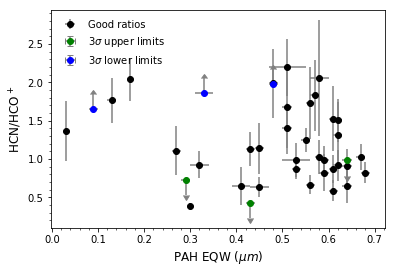

In [8]:
plt.figure()
plt.minorticks_on()
plt.errorbar(data['PAH62'][nolim],
             ratio[nolim],
             marker='o',
             color='black',
             linestyle='',
             ecolor='gray',
             xerr=data['PAH62err'][nolim],
             yerr=ratioerr[nolim],
             label='Good ratios')
plt.xlabel(r'PAH EQW ($\mu m$)', fontsize='large')
plt.ylabel(r'HCN/HCO$^+$', fontsize='large')

# we can issue multiple plot commands to put things on the same figure axes
# (dividing and multiplying by 3 to make them 3-sigma limits)
nlim = len(data['PAH62'][uplim])
arrowlen = 0.2 * np.ones(nlim)
plt.errorbar(data['PAH62'][uplim],
             3*ratio[uplim],
             marker='o',
             color='green',
             linestyle='',
             xerr=data['PAH62err'][uplim],
             yerr=arrowlen,
             ecolor='gray',
             uplims=True,
             label=r'3$\sigma$ upper limits')

nlim = len(data['PAH62'][lolim])
arrowlen = 0.2 * np.ones(nlim)
plt.errorbar(data['PAH62'][lolim],
             ratio[lolim]/3.,
             marker='o',
             color='blue',
             linestyle='',
             xerr=data['PAH62err'][lolim],
             yerr=arrowlen,
             ecolor='gray',
             lolims=True,
             label=r'3$\sigma$ lower limits')
plt.legend(loc='best', frameon=False)

Let's colorize the points by something. How about the PAH EQW?

There are [lots of colormaps](http://matplotlib.org/users/colormaps.html), but we'll use `viridis`, since it's perceptual and colorblind-friendly.

Here we'll plot the points separately from their limits.

I'll leave adding the upper limits as an exercise for the reader :)

(0, 3.0)

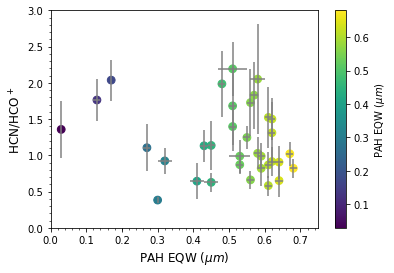

In [9]:
plt.figure()
plt.minorticks_on()
# first plot the errobars 
plt.errorbar(data['PAH62'][nolim],
             ratio[nolim],
             marker='',
             linestyle='',
             ecolor='gray',
             xerr=data['PAH62err'][nolim],
             yerr=ratioerr[nolim])

# now, overplot the points colored by PAH EQW
plt.scatter(data['PAH62'][nolim],
            ratio[nolim],
            s=60,
            c=data['PAH62'][nolim],
            cmap=plt.get_cmap('viridis'))
plt.xlabel(r'PAH EQW ($\mu m$)', fontsize='large')
plt.ylabel(r'HCN/HCO$^+$', fontsize='large')

# show and label the color bar
cbar = plt.colorbar()
cbar.set_label(r'PAH EQW ($\mu m$)')

# manually set the scaling, because otherwise it goes past 0 on the x-axis
plt.xlim([0,0.75])
# this is the same as the autoscaling for the y-axis, but just to show you can
# adjust it too
plt.ylim([0, 3.])

## Histogramas

Let's start with a standard histogram. We'll let matplotlib pick the bins, but you can provide your own as an array via the `bins` argument.

Text(0,0.5,'N')

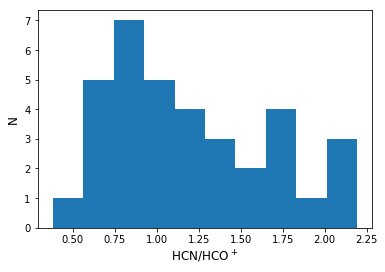

In [10]:
n, bins, patches = plt.hist(ratio[nolim], bins=10)
plt.xlabel(r'HCN/HCO$^+$', fontsize='large')
plt.ylabel('N', fontsize='large')

In [11]:
print(n)
print(bins)

[ 1.  5.  7.  5.  4.  3.  2.  4.  1.  3.]
[ 0.38258165  0.56367832  0.744775    0.92587167  1.10696834  1.28806502
  1.46916169  1.65025837  1.83135504  2.01245171  2.19354839]


Es posible también definir manualmente los bins

Text(0,0.5,'N')

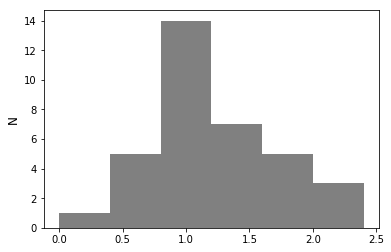

In [12]:
mybins = np.arange(0, 2.5, 0.4)
n, bins, patches = plt.hist(ratio[nolim],
                            bins=mybins,
                            color='gray',
                            normed=False) 
plt.ylabel('N', fontsize='large')

## Gráficos de cajas

Let's revisit the plot of the HCN/HCO+ ratio against PAH EQW, and look at the distribution of points, via a boxplot.

Text(0,0.5,'HCN/HCO$^+$')

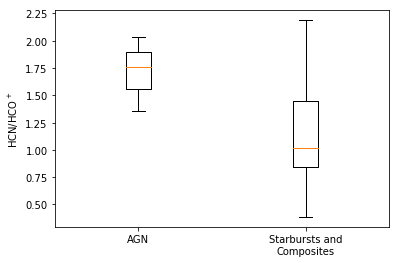

In [13]:
plt.boxplot([ratio[nolim][data[nolim]['PAH62']<0.2],
             ratio[nolim][data[nolim]['PAH62']>=0.2]],
            showcaps=True,
            showmeans=False,
            labels=['AGN', 'Starbursts and\nComposites'])
plt.ylabel(r'HCN/HCO$^+$')

## Gráfico tipo violín

A slightly more information-dense version of this is the `violin` plot, which adds a kernel estimated density distribution.

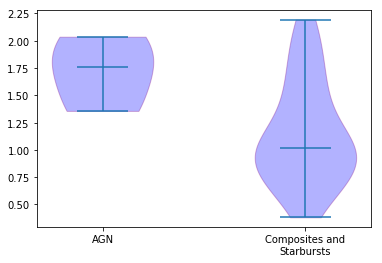

In [14]:
fig = plt.figure()
res = plt.violinplot([ratio[nolim][data[nolim]['PAH62']<0.2],
                ratio[nolim][data[nolim]['PAH62']>=0.2]],
               showmedians=True,
               showmeans=False,
               showextrema=True)

# it takes a bit more work to add labels to this plot
plt.xticks(np.arange(1,3,1), ['AGN', 'Composites and\nStarbursts'])

# let's change the default colors
for elem in res['bodies']:
    elem.set_facecolor('blue')
    elem.set_edgecolor('purple')

### Crear figuras multipanel

Let's say we want to show the boxplot and the data next to each other. How do we do that?

(1, 3)


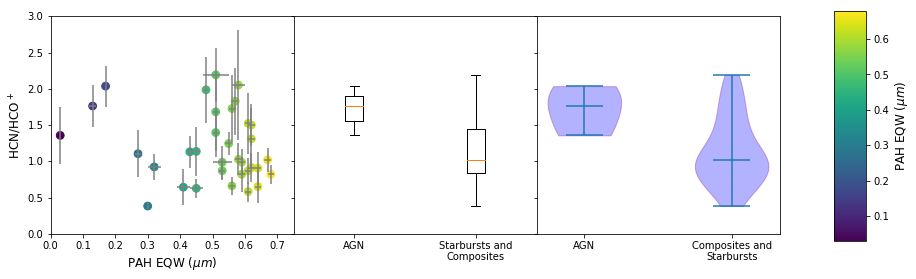

In [15]:
fig, ax = plt.subplots(1, 3,
                       sharey=True,
                       squeeze=False,
                       figsize=(15,4))
# now, ax is a 1x3 array
print(ax.shape)

# we can do the same commands as above. But now instead of issuing plot commands
# via "plt.", we assign them directly to the axes.
ax[0][0].errorbar(data['PAH62'][nolim],
             ratio[nolim],
             marker='',
             linestyle='',
             ecolor='gray',
             xerr=data['PAH62err'][nolim],
             yerr=ratioerr[nolim])

# now, overplot the points colored by PAH EQW
im = ax[0][0].scatter(data['PAH62'][nolim],
                      ratio[nolim],
                      s=60,
                      c=data['PAH62'][nolim],
                      cmap=plt.get_cmap('viridis'))

# setting labels using the axis is slightly different
ax[0][0].set_xlabel(r'PAH EQW ($\mu m$)', fontsize='large')
ax[0][0].set_ylabel(r'HCN/HCO$^+$', fontsize='large')

# show and label the color bar
#cbar = ax[0][0].colorbar()
#cbar.set_label(r'PAH EQW ($\mu m$)')

# manually set the scaling, because otherwise it goes past 0 on the x-axis
ax[0][0].set_xlim([0,0.75])
# this is the same as the autoscaling for the y-axis, but just to show you can
# adjust it too
ax[0][0].set_ylim([0, 3.])

ax[0][1].boxplot([ratio[nolim][data[nolim]['PAH62']<0.2],
             ratio[nolim][data[nolim]['PAH62']>=0.2]],
            labels=['AGN', 'Starbursts and\nComposites'])

res = ax[0][2].violinplot([ratio[nolim][data[nolim]['PAH62']<0.2],
                ratio[nolim][data[nolim]['PAH62']>=0.2]],
               showmedians=True,
               showmeans=False,
               showextrema=True)

# it takes a bit more work to add labels to this plot
ax[0][2].set_xticks(np.arange(1,3,1))
ax[0][2].set_xticklabels(['AGN', 'Composites and\nStarbursts'])

# let's change the default colors
for elem in res['bodies']:
    elem.set_facecolor('blue')
    elem.set_edgecolor('purple')

# now let's make the two plots without any space between them
fig.subplots_adjust(hspace=0, wspace=0)

# adding a colorbar is slightly more complicated when doing subplots.
# here's one way...
# not we added a "im =", to the scatter plot for this.
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.03, 0.8])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'PAH EQW ($\mu m$)', fontsize='12')